In [17]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import random
from scipy.interpolate import interp1d
from scipy import optimize

# Ensure we begin with defaults before making modifications
mpl.rcdefaults()

# Set the color palette with seaborn
sns.set_palette("Set1")
my_palette = sns.color_palette("Set1")

# Set up general parameters for plotting
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.weight'] = 'light'
mpl.rcParams['font.sans-serif'] = 'Gill Sans'
mpl.rcParams['figure.figsize'] = (3.375,2.25) #inches
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['lines.linewidth'] = 0.5
mpl.rcParams['lines.markersize'] = 1
mpl.rcParams['axes.unicode_minus'] = True
mpl.rcParams['xtick.major.size'] = 3
mpl.rcParams['xtick.major.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 3
mpl.rcParams['ytick.major.width'] = 0.5
mpl.rcParams['savefig.transparent'] = True
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['savefig.format'] = 'pdf' 
mpl.rcParams['savefig.pad_inches'] = 0.15

In [18]:
import glob

LList = [20,30,40,50,75]
TList = [2*L**2 for L in LList]

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def DataGrab(Entropyfilepath):
    Entropy = []
    EntropyData = []

    for files in glob.glob(Entropyfilepath):
            Entropy.append(files)

    for files in Entropy:
            with open(files,'rb') as f:
                filedata = np.load(f)
                EntropyData.append(filedata)

    return EntropyData

#4000 Realization data for lower system sizes
def ListAdder(DataToAdd):
    result = np.zeros(len(DataToAdd[0][0]))
    for i in DataToAdd[0]:
        result = result + i
    result = result/4000
    result = np.delete(result,0) #Trim the 'initial' entropy value 
    return result

def STDCalc(DataToAdd):
    result = np.zeros(len(DataToAdd[0][0]))
    concarr = np.vstack(DataToAdd[0])
    for i in range(len(result)):
        result[i] = np.std(concarr[:,i]/np.sqrt(4000))
    result = np.delete(result,0)
    return result

TDPctrl = {}
PlotNormT = {}
PlotSqrtT = {}
PlotP400NormT = {}
PlotP400SqrtT = {}
TDPctrlstd = {}

for L in LList:
    TempDataPctrl = DataGrab(f"HPCBernoulliData\HighRealsTDData\L{L}P500TDBernoulliDataEntropy.npy")
    TDPctrl[L] = ListAdder(TempDataPctrl)
    TDPctrlstd[L] = STDCalc(TempDataPctrl)

for T in TList:
    temp = []
    for i in range(T):
        # if i%5 == 0:
        if i%(T//50)==0:
            temp.append(i)
    PlotNormT[T] = (np.asarray(temp)/((T/2)))
    PlotSqrtT[T] = np.sqrt(np.asarray(temp)/(T/2))

In [19]:
FitPlotNormT = np.array([x for x in PlotSqrtT[2*75**2] if (x>1)])
indicesPlot = [i for i,x in enumerate(PlotSqrtT[2*75**2]) if (x>1)]
FitLvals = TDPctrl[75][indicesPlot]
print(np.average(FitLvals))
print(np.std(FitLvals))

0.17297916666666668
0.007656668072485719


<Figure size 337.5x225 with 0 Axes>

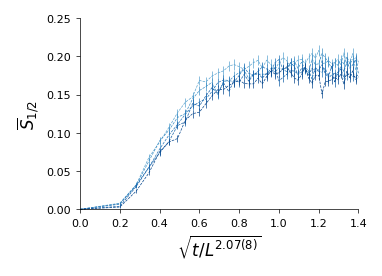

In [20]:
LList = [20,30,40,50,75]

colors = sns.color_palette('Blues', len(LList)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

i=5
for L in LList:
    plt.plot(PlotSqrtT[2*L**2], TDPctrl[L],"--", c = colors[i], clip_on = False)
    ax.errorbar(PlotSqrtT[2*L**2], TDPctrl[L], yerr=TDPctrlstd[L], ecolor=colors[i], fmt='none')
    i += 1
plt.ylabel(r'$\overline{S}_{1/2}$', fontsize = 12) #at p=0.5
plt.xlabel(r'$\sqrt{t/L^{2.07(8)}}$', fontsize = 12)
plt.ylim(0,0.25)
plt.xlim(0,1.4)

# plt.savefig('TDHalfCutEntropyPlotPctrl', bbox_inches = 'tight')

plt.show()

In [21]:
import glob

LList = [20,30,40,50,75,100,125,150]
TList = [2*L**2 for L in LList]

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def DataGrab(Entropyfilepath):
    Entropy = []
    EntropyData = []

    for files in glob.glob(Entropyfilepath):
            Entropy.append(files)

    for files in Entropy:
            with open(files,'rb') as f:
                filedata = np.load(f)
                EntropyData.append(filedata)

    return EntropyData

#1000 realization data
def ListAdder(DataToAdd):
    result = np.zeros(len(DataToAdd[0][0]))
    for i in DataToAdd[0]:
        result = result + i
    result = result/1000
    result = np.delete(result,0) #Trim the 'initial' entropy value 
    return result

def STDCalc(DataToAdd):
    result = np.zeros(len(DataToAdd[0][0]))
    concarr = np.vstack(DataToAdd[0])
    for i in range(len(result)):
        result[i] = np.std(concarr[:,i]/np.sqrt(1000))
    result = np.delete(result,0)
    return result

TDPent = {}
TDPctrl = {}
PlotNormT = {}
PlotSqrtT = {}
PlotP400NormT = {}
PlotP400SqrtT = {}
TDAncillaP400 = {}
TDAncillaPent = {}
TDAncillaPctrl = {}
TDPentstd = {}
TDPctrlstd = {}
TDAncillaPentstd = {}
TDAncillaPctrlstd = {}

for L in LList:
    TempDataPent = DataGrab(f"HPCBernoulliData\TDData\L{L}P266TDBernoulliDataEntropy.npy")
    TempDataPctrl = DataGrab(f"HPCBernoulliData\TDData\L{L}P500TDBernoulliDataEntropy.npy")
    TempAncillaDataPent = DataGrab(f"HPCAncillaBernoulliData\TDData\L{L}P266TDAncillaBernoulliDataEntropy.npy")
    TempAncillaDataPctrl = DataGrab(f"HPCAncillaBernoulliData\TDData\L{L}P500TDAncillaBernoulliDataEntropy.npy")
    TempAncillaDataP400 = DataGrab(f"HPCAncillaBernoulliData\TDData\L{L}P400TDAncillaBernoulliDataEntropy.npy")
    TDPent[L] = ListAdder(TempDataPent)
    TDPctrl[L] = ListAdder(TempDataPctrl)
    TDAncillaPent[L] = ListAdder(TempAncillaDataPent)
    TDAncillaPctrl[L] = ListAdder(TempAncillaDataPctrl)
    TDAncillaP400[L] = ListAdder(TempAncillaDataP400)
    TDPentstd[L] = STDCalc(TempDataPent)
    TDPctrlstd[L] = STDCalc(TempDataPctrl)
    TDAncillaPentstd[L] = STDCalc(TempAncillaDataPent)
    TDAncillaPctrlstd[L] = STDCalc(TempAncillaDataPctrl)

for T in TList:
    temp = []
    for i in range(T):
        # if i%(T//50) == 0:
        if i%5==0:
            temp.append(i)
    PlotNormT[T] = (np.asarray(temp)/((T/2)))
    PlotSqrtT[T] = np.sqrt(np.asarray(temp)/(T/2))

<Figure size 337.5x225 with 0 Axes>

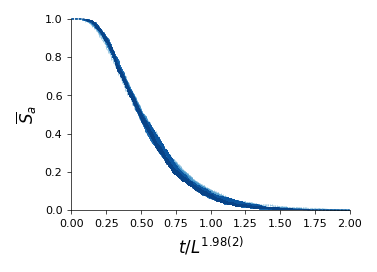

In [22]:
LList = [20,30,40,50,75,100,125,150]

colors = sns.color_palette('Blues', len(LList)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

i=5
for L in LList:
    plt.plot(PlotNormT[2*L**2], TDAncillaPctrl[L],"--", c = colors[i], clip_on = False)
    ax.errorbar(PlotNormT[2*L**2], TDAncillaPctrl[L], yerr=TDAncillaPctrlstd[L], ecolor=colors[i], fmt='none')
    i += 1
plt.ylabel(r'$\overline{S}_{a}$', fontsize = 12) #at p=0.5
plt.xlabel(r'$t/L^{1.98(2)}$',fontsize = 12)
plt.ylim(0,1)
plt.xlim(0,2)

# plt.savefig('TDAncillaEntropyPlotPctrl', bbox_inches = 'tight')

plt.show()

<Figure size 337.5x225 with 0 Axes>

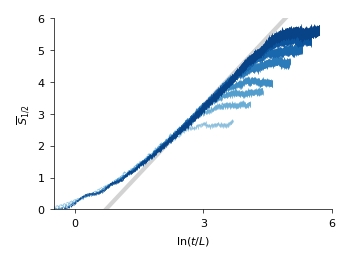

In [23]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for T in TList:
        temp = []
        for i in range(T):
            # if i%(T//50) == 0:
            if i%5==0:
                temp.append(i)
        PlotNormT[T] = np.log(np.asarray(temp)/np.sqrt((T/2)))
        PlotSqrtT[T] = np.sqrt(np.asarray(temp)/(T/2))

colors = sns.color_palette('Blues', len(LList)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

i=5

plt.plot(PlotNormT[2*150**2]+.72,1.431*PlotNormT[2*150**2], linestyle = "solid",linewidth = 3, c = 'lightgrey')
for L in LList:
    plt.plot(PlotNormT[2*L**2], TDPent[L],"--", c = colors[i])
    ax.errorbar(PlotNormT[2*L**2], TDPent[L], yerr=TDPentstd[L], ecolor=colors[i], fmt='none')
    i += 1
plt.ylabel(r'$\overline{S}_{1/2}$') #at p=0.266
plt.xlabel(r'ln($t/L$)')
plt.ylim(0,6)
plt.xlim(-0.5,6)
plt.xticks([0,3,6])

# plt.savefig('HalfCutEntropyTransitionWithLogPctrl', bbox_inches = 'tight')

plt.show()

<Figure size 337.5x225 with 0 Axes>

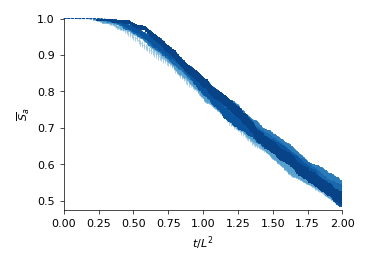

In [24]:
LList = [20,30,40,50,75,100,125,150]

for T in TList:
    temp = []
    for i in range(T):
        # if i%(T//50) == 0:
        if i%5==0:
            temp.append(i)
    PlotNormT[T] = (np.asarray(temp)/((T/2)))
    PlotSqrtT[T] = np.sqrt(np.asarray(temp)/(T/2))

colors = sns.color_palette('Blues', len(LList)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

i=5

for L in LList:
    plt.plot(PlotNormT[2*L**2], TDAncillaPent[L],"--", c = colors[i], clip_on = False)
    ax.errorbar(PlotNormT[2*L**2], TDAncillaPent[L], yerr=TDAncillaPentstd[L], ecolor=colors[i], fmt='none')
    i += 1
plt.ylabel(r'$\overline{S}_{a}$') #at p=0.266
plt.xlabel(r'$t/L^{2}$')
plt.ylim(0.475,1)
plt.xlim(0,2)

# plt.savefig('AncillaEntropyTransitionPent', bbox_inches = 'tight')

plt.show()

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import json

def DataGrab(Entropyfilepath):
    Entropy = []
    EntropyData = []

    for files in glob.glob(Entropyfilepath):
            Entropy.append(files)

    for files in Entropy:
            with open(files,'rb') as f:
                filedata = np.load(f,allow_pickle=True)
                EntropyData.append(filedata)

    return EntropyData

#In the initial version of the data, there was no conditional check to put a 0 in the measuremnet array and was instead always putting a 0 regardless of correctly
#measuring the up qubit in the final index. As a result, we had extra zeroes that needed to be filtered out and hence why this step takes ~8 minutes to complete.
#Also, the -1 values correspond to the Bernoulli map application where no measurement was performed so those values will also be filtered out.
def DataPrep(DataToPrep):
    for i in DataToPrep:
        new_data = np.delete(DataToPrep,np.where(i == -1))
    avg = np.average(new_data) #computes local magnetization in the realization
    return avg #computes global magnetization over all realizations

Llist = [25,50,75,100,125]
BernoulliProbs = [.100,.190,.200,.210,.230,.250,.270,.275,.285,.290,.295,.300,.400,.420,.440,.460,.475,.480,.485,.490,.495,.500,.505,.510,.515,.520,.525,.540,.560,.580,.600,.700,.800,.900]

BernoulliMeasures = {}

for L in Llist:
    temp = []
    for p in BernoulliProbs:
        temp2 = []
        if L == 50:
            a = DataGrab(f'HPCBernoulliData\L50DataMeasurements\L{L}P{str(int(round(float(p)*1000,0)))}DenseProbBernoulliDataMeasurements.npy')[0]
        else:
             a = DataGrab(f'HPCBernoulliData\L{L}Data\L{L}P{str(int(round(float(p)*1000,0)))}DenseProbBernoulliDataMeasurements.npy')[0]
        for i in range(len(a)): 
            newarray = np.delete(np.array(a[i]), np.where(np.array(a[i]) == -1))
            localrealizationavg = newarray.tolist().count(1)/newarray.tolist().count(0)
            temp2.append(localrealizationavg)
        temp.append(np.average((np.array(temp2)-0.5)*(-2))) #rescales the measurement output to be between 1 and -1 instead of 0 and 1
    BernoulliMeasures[L] = temp

<Figure size 337.5x225 with 0 Axes>

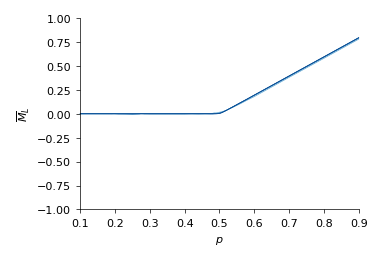

In [26]:
LList = [25,50,75,100,125]

colors = sns.color_palette('Blues', len(LList)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

i=5

for L in Llist:
    plt.plot(BernoulliProbs,BernoulliMeasures[L], c = colors[i], clip_on = False)
    i += 1
plt.xlim((0.1,0.9))
plt.ylim((-1,1))
plt.ylabel(r'$\overline{M}_{L}$')
plt.xlabel(r'$p$')

# plt.savefig('MeasurementRecord', bbox_inches = 'tight')

plt.show()

In [27]:
from GeneralBernoulliPlotter import GraphDataPrep

BernoulliDataScaling = {}  #Make a dictionary of all the data. Indices 0 and 2 are the entropy and mag data and indices 1 and 3 are the error bar data for entropy and mag respectively

keylistScaling = [20,30,40,50,75,100,125,150,175,200] 
probkeys = [0.1, 0.19, 0.2, 0.21, 0.23, 0.25, 0.266, 0.27, 0.275, 0.285,0.29,0.30]
graphprobs = [0.1, 0.19, 0.2, 0.21, 0.23, 0.25, 0.266, 0.27, 0.275, 0.285, 0.29,0.30]

for L in keylistScaling:
    BernoulliDataScaling[L] = GraphDataPrep(f'HPCBernoulliData\L{L}Data\L{L}P???DenseProbBernoulliDataEntropy.npy',f'HPCBernoulliData\L{L}Data\L{L}P???DenseProbBernoulliDataMag.npy')

#Prepare the entropy data along a system size slice so we can plot vs L instead of p:
for posp,p in enumerate(probkeys):
    templist = []
    for L in keylistScaling:
        templist.append(BernoulliDataScaling[L][0][posp])
    BernoulliDataScaling[f'p{p}'] = templist

<Figure size 337.5x225 with 0 Axes>

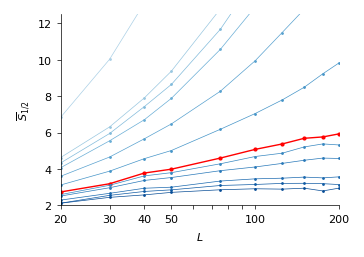

In [28]:
colors = sns.color_palette('Blues', len(probkeys)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

scale = 1/2
i=5

for p in graphprobs:
    if p != 0.266:
        plt.plot(keylistScaling, BernoulliDataScaling[f'p{p}'],'-o',  c = colors[i])
        i += 1
    else:
        plt.plot(keylistScaling, BernoulliDataScaling[f'p{0.266}'],'-o',linewidth = 1, ms=2,  c = 'red')
plt.xscale("log")
plt.ylim([2,scale*25])
plt.xlim(20,200)
plt.xticks(ticks=[20,30,40,50,60,70,80,90,100,200],labels=["20","30","40","50"," "," "," "," ","100","200"])
plt.ylabel(r'$\overline{S}_{1/2}$')
plt.xlabel(r'$L$')

# plt.savefig('HalfCutEntropyLogScaling', bbox_inches = 'tight')

plt.show()

In [29]:
AncillaBernoulliData = {}
BernoulliData = {}

keylist = [20,30,40,50,75,100,125,175,200] #Static list
AncillaProbs = np.array([.1,.18,.19,.20,.21,.22,.23,.24,.25,.255,.26,.265,.270,.275,.280,.290,.300,.400])
BernoulliProbs = [.100,.190,.200,.210,.230,.250,.266,.270,.275,.285,.290,.295,.300,.400,.420,.440,.460,.475,.480,.485,.490,.495,.500,.505,.510,.515,.520,.525,.540,.560,.580,.600,.700,.800,.900]
StringBernoulliProbs = [str(int(round(float(p)*1000,0))) for p in BernoulliProbs]
avgL = {}
stdL = {}
ancavgL = {}
ancstdL = {}

#Grab all Ancilla Data
for L in keylist:
    AncillaBernoulliData[L] = GraphDataPrep(f'HPCAncillaBernoulliData\SymmetricPVals\L{L}Anc\L{L}P???*AncillaBernoulliDataEntropy.npy',f'HPCAncillaBernoulliData\SymmetricPVals\L{L}Anc\L{L}P???*AncillaBernoulliDataMag.npy') #indices 0 = EntropyAVG, 1 = EntropySTD, 2 = MagAVG, 3 = MagSTD 

#Grab all Bernoulli Data
for L in keylist:
    BernoulliData[L] = GraphDataPrep(f'HPCBernoulliData\SymmetricPVals\L{L}Data\L{L}P???DenseProbBernoulliDataEntropy.npy',f'HPCBernoulliData\SymmetricPVals\L{L}Data\L{L}P???DenseProbBernoulliDataMag.npy') #indices 0 = EntropyAVG, 1 = EntropySTD, 2 = MagAVG, 3 = MagSTD 

for L in keylist:
    stdL[L] = BernoulliData[L][3]
    ancstdL[L] = AncillaBernoulliData[L][1]


<Figure size 337.5x225 with 0 Axes>

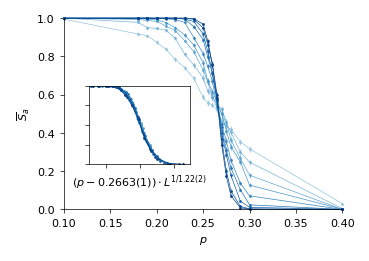

In [30]:
keylist = [20,30,40,50,75,100,125,175,200]
AncillaProbs = np.array([.1,.18,.19,.20,.21,.22,.23,.24,.25,.255,.26,.265,.270,.275,.280,.290,.300,.400])
BernoulliProbs = [.100,.190,.200,.210,.230,.250,.266,.270,.275,.285,.290,.295,.300,.400,.420,.440,.460,.475,.480,.485,.490,.495,.500,.505,.510,.515,.520,.525,.540,.560,.580,.600,.700,.800,.900]

colors = sns.color_palette('Blues', len(keylist)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])


i=5

for L in keylist:
    plt.plot(AncillaProbs, AncillaBernoulliData[L][0][0:18],"-o", c = colors[i], clip_on = False)
    ax.errorbar(AncillaProbs, AncillaBernoulliData[L][0][0:18], yerr=ancstdL[L], ecolor=colors[i], fmt='none')
    i += 1
plt.ylabel(r'$\overline{S}_{a}$')
plt.xlabel(r'$p$')
plt.xlim(.1,.4)
plt.ylim(0,1)

ax2 = fig.add_axes([0.25, 0.35, 0.3,0.35])
i = 5
for L in keylist:
    plt.plot((AncillaProbs[3:17]-0.2663784070966458)*L**(1/1.223249941734898), AncillaBernoulliData[L][0][3:17],"-o", c = colors[i])
    i += 1
plt.xlabel(r'$(p-0.2663(1))\cdot L^{1/1.22(2)}$',labelpad=-8)
plt.xticks(ticks=[-2,0,2],labels=[" " for i in range(3)])
plt.xlim(-3,3)
plt.ylim(0,1)
plt.yticks(ticks=[0,0.25,0.5,0.75,1], labels = [" " for i in range (5)])

ax2.spines["top"].set_visible(True)
ax2.spines["right"].set_visible(True)

# plt.savefig('AncillaPlotAndCollapseInset', bbox_inches = 'tight')

plt.show()

<Figure size 337.5x225 with 0 Axes>

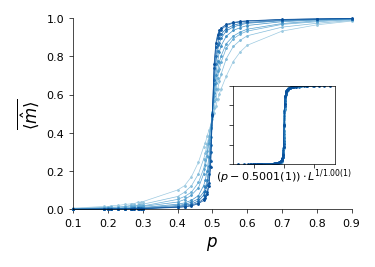

In [31]:
colors = sns.color_palette('Blues', len(keylistScaling)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

i=5

for L in keylist:
    plt.plot(BernoulliProbs, BernoulliData[L][2],"-o", c= colors[i], clip_on = False)
    ax.errorbar(BernoulliProbs, BernoulliData[L][2], yerr=stdL[L], ecolor=colors[i], fmt='none')
    i += 1
plt.ylabel(r'$\overline{\langle \hat m\rangle}$', fontsize = 12)
plt.xlabel(r'$p$',fontsize = 12)
plt.xlim(0.1,0.9)
plt.ylim(0,1)

ax2 = fig.add_axes([0.65, 0.35, 0.3,0.35])
i = 5

for L in keylist:
    plt.plot((np.array(BernoulliProbs)-0.5001695432885682)*L**(1/1.0058742046683382), BernoulliData[L][2],"-o", c = colors[i])
    i += 1
plt.xlabel(r'$(p-0.5001(1))\cdot L^{1/1.00(1)}}$',labelpad=-12,fontsize = 8)
plt.xticks(ticks = [-50,0,50], labels=[" " for i in range(3)])
plt.ylim(0,1)
plt.yticks(ticks=[0,0.25,0.5,0.75,1], labels = [" " for i in range (5)])

ax2.spines["top"].set_visible(True)
ax2.spines["right"].set_visible(True)

# plt.savefig('OrderParameterPlotWithInset', bbox_inches = 'tight')

plt.show()

<Figure size 337.5x225 with 0 Axes>

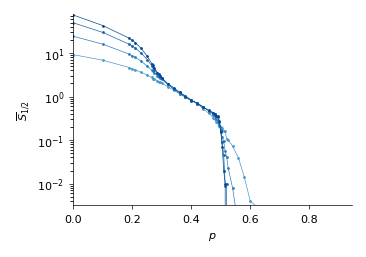

In [32]:
FullBernoulliProbs = [.100,.190,.200,.210,.230,.250,.266,.270,.275,.285,.290,.295,.300,.400,.420,.440,.460,.475,.480,.485,.490,.495,.500,.505,.510,.515,.520,.525,.540,.560,.580,.600,.700,.800,.900]
SmallLList = [20,50,100,150]
BernoulliPctrlData = {}

for L in SmallLList:
    BernoulliPctrlData[L] = GraphDataPrep(f'HPCBernoulliData\L{L}Data\L{L}P*DenseProbBernoulliDataEntropy.npy',f'HPCBernoulliData\L{L}Data\L{L}P*DenseProbBernoulliDataMag.npy')

FullBernoulliProbs = [0,.100,.190,.200,.210,.230,.250,.266,.270,.275,.285,.290,.295,.300,.320,.340,.360,.380,.400,.420,.440,.460,.475,.480,.485,.490,.495,.500,.505,.510,.515,.520,.525,.540,.560,.580,.600,.700,.800,.900]
SmallLList = [20,50,100,150]
BernoulliPctrlData = {}

for L in SmallLList:
    BernoulliPctrlData[L] = GraphDataPrep(f'HPCBernoulliData\L{L}Data\L{L}P*DenseProbBernoulliDataEntropy.npy',f'HPCBernoulliData\L{L}Data\L{L}P*DenseProbBernoulliDataMag.npy')

colors = sns.color_palette('Blues', len(SmallLList)+5)

plt.clf()
fig = plt.figure()
ax = fig.add_axes([0.175,0.15,0.825,0.85])

i=5
for L in [20,50,100,150]:
    plt.plot(FullBernoulliProbs, BernoulliPctrlData[L][0], "-o", c = colors[i])
    i += 1
plt.xlabel(r'$p$')
plt.ylabel(r'$\overline{S}_{1/2}$')
plt.ylim(bottom = 10**(-2.5))
plt.yscale('log')
plt.xlim(left = 0)

# plt.savefig('SvsPforAFewLValuesLogFullPoints')

plt.show()